# Panama papers: the names (visualisation)

([Data Source](http://features.thesundaytimes.co.uk/web/public/2016/04/10/index.html))

## Visualise with Networkx

In [2]:
import networkx as nx
from collections import Counter

import csv

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import rgb2hex

%matplotlib inline

sns.set(font='Avenir', style='white')

/Users/l/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# create networkx graph
G = nx.read_edgelist('../data/officers_edges.tsv', delimiter='\t')

In [4]:
print G.number_of_edges()
print G.number_of_nodes()   # no. of distinct names

1180
772


In [5]:
colors = [rgb2hex(color) for color in sns.color_palette('Set2', n_colors=3)]

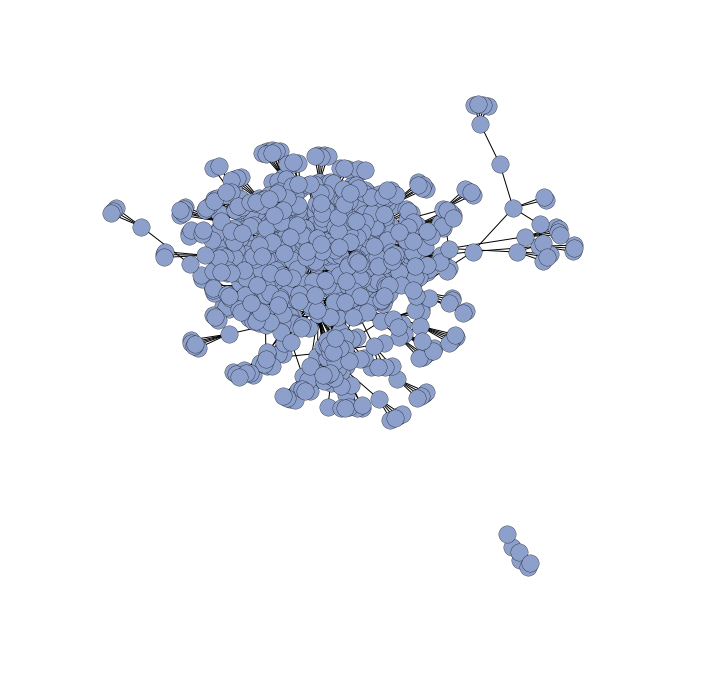

In [7]:
plt.figure(figsize=(9,9))

nx.draw(G, with_labels=False, node_color=colors[2])  # nodes and edges

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos)    # nodes only
# nx.draw_networkx_edges(G, pos)    # edges only

plt.show()

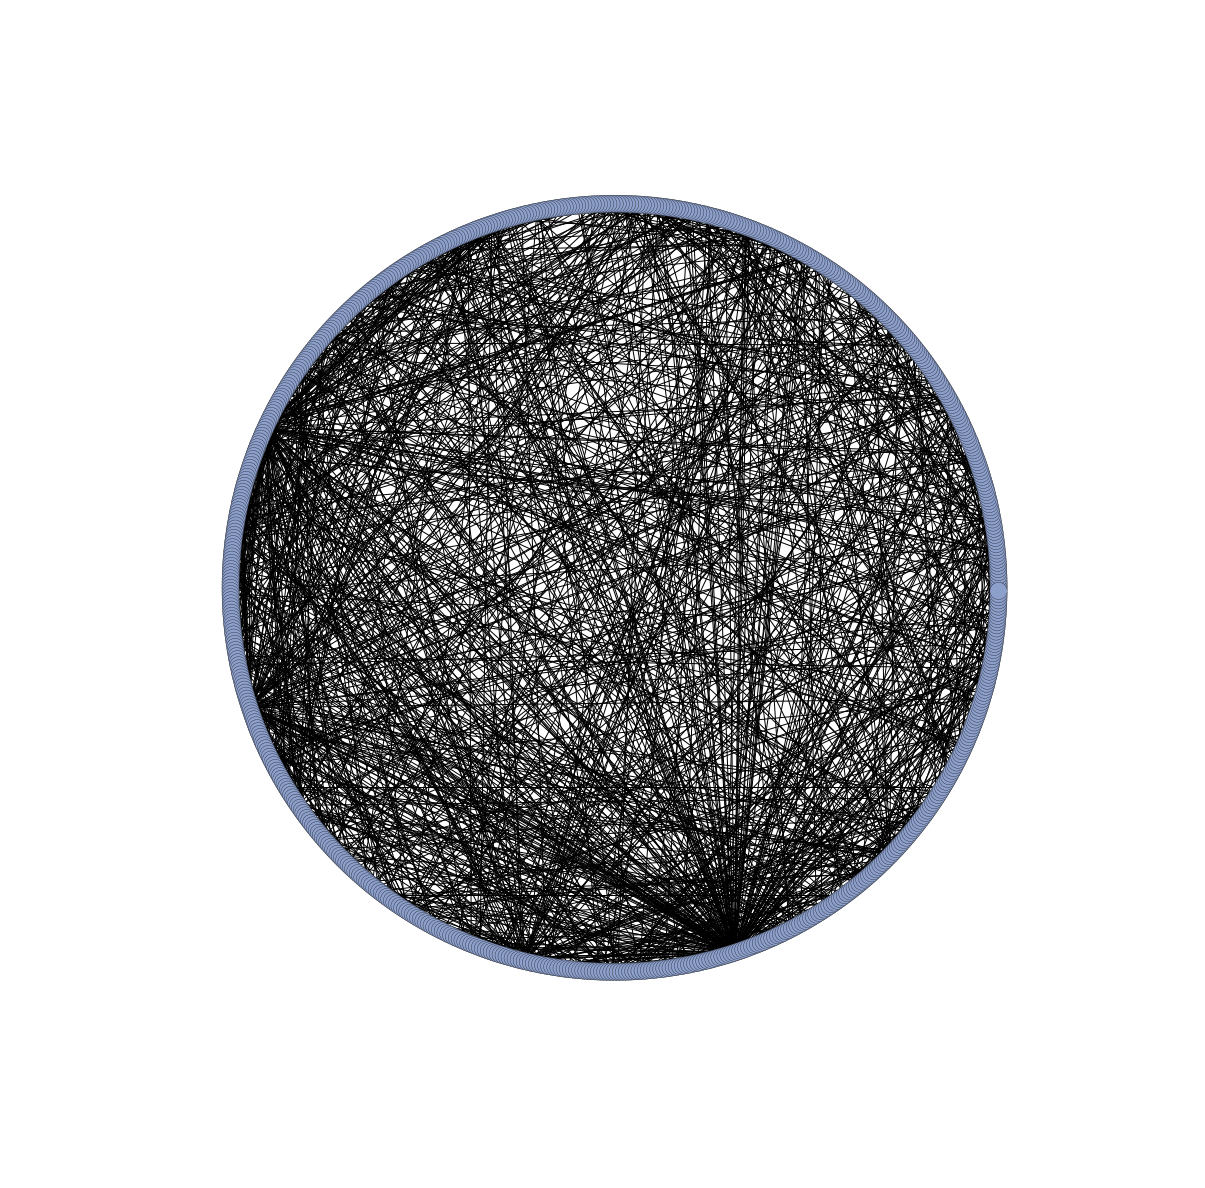

In [8]:
plt.figure(figsize=(16,16))

nx.draw_circular(G, node_color=[colors[2]]*G.number_of_nodes())

plt.show()

In [10]:
for t in Counter(nx.degree_centrality(G)).most_common(10):
    print t

(u'JURGEN MOSSACK', 0.2204928664072633)
(u'EL PRESIDENTE, EN SU AUSENCIA EL TESORERO O EL SECRETARIO', 0.12062256809338522)
(u'DIVA ARGELIS PATINO DE DONADO', 0.0920881971465629)
(u'EL PRESIDENTE', 0.04928664072632944)
(u'RAMON FONSECA MORA', 0.027237354085603113)
(u'LETICIA MONTOYA MORAN', 0.02464332036316472)
(u'MOSSACK FONSECA & CO', 0.01815823605706874)
(u'FRANCIS PEREZ', 0.012970168612191958)
(u'ALFREDO FONSECA ZAMORA', 0.012970168612191958)
(u'BRACKEN HOLDINGS S.A.', 0.011673151750972763)


In [11]:
# betweenness centrality = equal to the number of shortest paths 
# from all vertices to all others that pass through that node

for t in Counter(nx.betweenness_centrality(G)).most_common(10):
    print t

(u'JURGEN MOSSACK', 0.6806982443854573)
(u'EL PRESIDENTE', 0.21850450001434862)
(u'MOSSACK FONSECA & CO', 0.11287869046675966)
(u'EL PRESIDENTE, EN SU AUSENCIA EL TESORERO O EL SECRETARIO', 0.10888582504315325)
(u'DIVA ARGELIS PATINO DE DONADO', 0.07845278996906026)
(u'BUFETE MF & CO', 0.05916754865212448)
(u'ALTAMIRA FUND INC.', 0.05719376149073726)
(u'UNIAID INC.', 0.056849046982741146)
(u'WOBAR INVESTMENTS S.A.', 0.049569779519446945)
(u'TIVOLI TRADING, CORP.', 0.04504848891332082)


In [12]:
for t in Counter(nx.edge_betweenness_centrality(G)).most_common(10):
    print t

((u'ALTAMIRA FUND INC.', u'EL PRESIDENTE'), 0.058290050517538446)
((u'MOSSACK FONSECA & CO', u'UNIAID INC.'), 0.05334318026023668)
((u'WOBAR INVESTMENTS S.A.', u'JURGEN MOSSACK'), 0.05100279692411624)
((u'ALTAMIRA FUND INC.', u'BUFETE MF & CO'), 0.048089593656994375)
((u'UNIAID INC.', u'JURGEN MOSSACK'), 0.04349788371684311)
((u'WOBAR INVESTMENTS S.A.', u'MARCELA ROJAS DE PEREZ'), 0.04311577670232977)
((u'TIVOLI TRADING, CORP.', u'JURGEN MOSSACK'), 0.03969783102080465)
((u'OXFORD INTERNATIONAL S. A.', u'LETICIA MONTOYA MORAN'), 0.032321920422192355)
((u'TIVOLI TRADING, CORP.', u'JURGEN MOSSACK 1'), 0.029465582856219606)
((u'INTERNACIONAL OIL MARKETING S.A.', u'MOSSACK FONSECA & CO'), 0.026637965043795158)


In [ ]:
# interactive javascript plot – computation intensive!
import jgraph

jgraph.draw(nx.edges(G), show_save=True)

In [13]:
# create networkx graph
B = nx.Graph()
colors = [str(rgb2hex(c)) for c in sns.color_palette('Set2', n_colors=2)]

color_map = dict()  # to store the color for each node

with open('../data/officers_bipartite.tsv', 'r') as f:
    tsvin = csv.reader(f, delimiter='\t')

    for row in tsvin:
        
        B.add_node(row[0], bipartite=0) # a node in B is actually just a string object
        color_map[row[0]] = colors[0]
        
        B.add_node(row[1], bipartite=1, color='k')
        color_map[row[1]] = colors[1]
        
        B.add_edge(row[0], row[1])
        
        # adds multiple nodes and edges at the same time
        # B.add_nodes_from([row[0]], bipartite=0)
        # B.add_nodes_from([row[1]], bipartite=1)
        # B.add_edges_from([(row[0], row[1])])
        

In [14]:
print nx.is_bipartite(B)
print nx.number_of_nodes(B)
print nx.number_of_edges(B)

True
772
1180


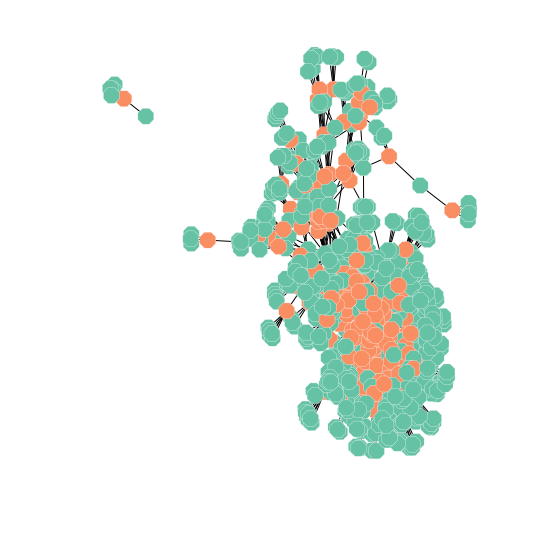

In [16]:
plt.figure(figsize=(9,9))

node_colors = [color_map[node] for node in B.nodes()]

# spring layout: white border
pos = nx.spring_layout(B) 
nodes = nx.draw_networkx_nodes(B,pos,node_color=node_colors, node_shape='8') 
nodes.set_edgecolor('w')

edges = nx.draw_networkx_edges(B,pos) 

plt.gca().axis('off')
plt.show()

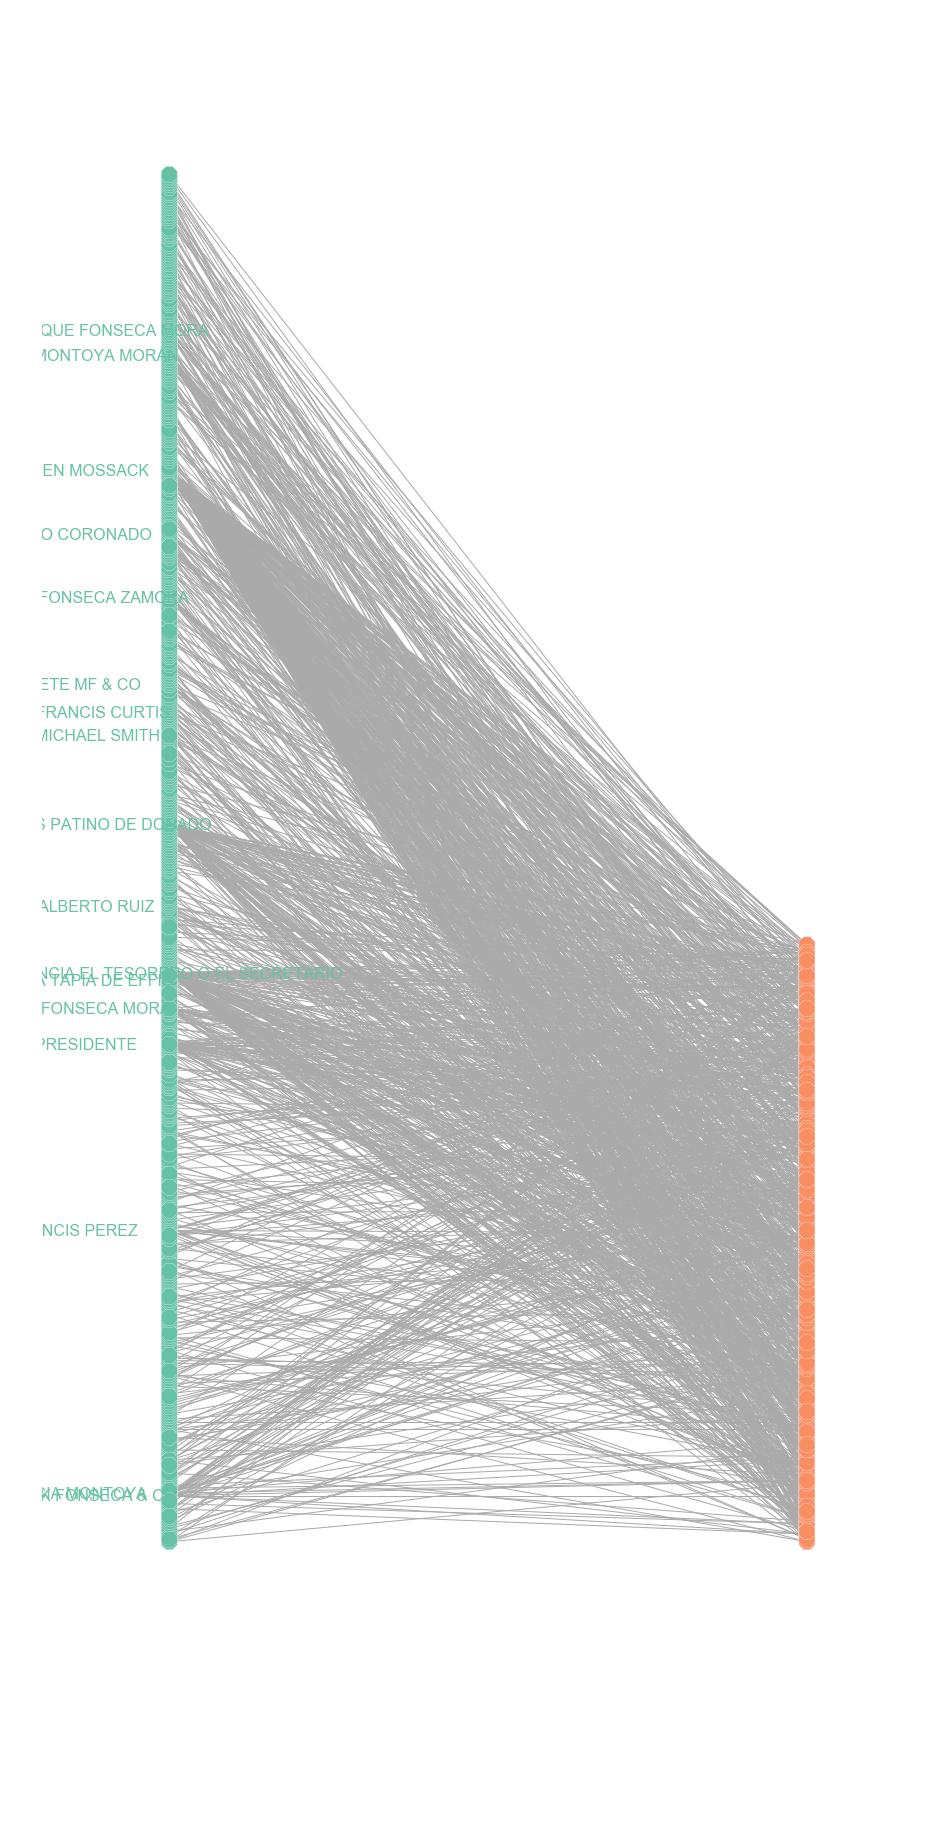

In [17]:
plt.figure(figsize=(16,32))

node_colors = [color_map[node] for node in B.nodes()]

# bipartite layout
officers, companies = nx.bipartite.sets(B)   # two sets of nodes (string objects)
officers, companies = list(officers), list(companies)  # order matters for labelling
BG = nx.complete_bipartite_graph( len(officers), len(companies) ) 


# plot nodes and edges separately to control the colors
pos = dict()
pos.update( (node, (1, i)) for i, node in enumerate(officers) )  # put officer nodes at x=1
pos.update( (node, (2, i)) for i, node in enumerate(companies) ) # put companie nodes at x=2
nodes = nx.draw_networkx_nodes(B, pos, node_color=node_colors, node_shape='8', with_labels=True) 
edges = nx.draw_networkx_edges(B, pos, edge_color='#aaaaaa')
nodes.set_edgecolor('w')

# find names that are associated with more than 5 companies
key_names, pos_names = dict(), dict()
for i, node in enumerate(officers):
    if len(nx.neighbors(B, node)) > 5:
        key_names[node] = node
        pos_names[node] = (0.85, i)  # incomplete: need to tweak this to right align/avoid overlap
        
nx.draw_networkx_labels(B, pos_names, key_names, font_size=16, font_color=colors[0])


plt.gca().axis('off')
plt.show()

## Visualise Network with Neo4j

In [18]:
from py2neo import Graph
from py2neo import Node
from py2neo import Relationship

from neo4jrestclient.client import GraphDatabase

from collections import Counter

In [19]:
import json

with open('../../auth/neo4j/neo4j.json', 'r') as f:
    json = json.load(f)
    USERNAME = json['username']
    PASSWORD = json['password']

In [20]:
url = 'http://%s:%s@localhost:7474/db/data/' % (USERNAME, PASSWORD)
graph = Graph(url)
gdb = GraphDatabase(url)

In [21]:
# delete all data and schema using py2neo
graph.delete_all()

# delete all data using neo4jrestclient
# _ = gdb.query("MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n,r")  # _ = to suppress output

### Load data into Neo4j database

In [22]:
client = MongoClient()
db = client['panama']
coll = db['company_reps']

In [23]:
# using py2neo
results = coll.find({}, { 'row_id':True, 'company_name': True, 'officers': True } )


for result in results:
    # create if not exist else merge
    company = graph.merge_one('Company', 'name', result['company_name'])


    for position, name in result['officers'].iteritems():
        person = graph.merge_one('Person', 'name', name)

        relationship = Relationship(person, position.upper(), company)
        
        # create if not exist
        graph.create_unique(relationship)
        

Exception KeyError: (u'http://localhost:7474/db/data/relationship/2839',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/2840',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/2841',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/2842',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/2843',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/2844',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/3457',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/relationship/3458',) in <function remove at 0x11a6960c8> ignored
Exception KeyError: (u'http://localhost:7474/db/data/rel

same code using neo4jrestclient (does not merge duplicates):
```py
results = coll.find({}, { 'company_name': True, 'officers': True } )

for result in results:
    company = gdb.nodes.create(label='Company', name=result['company_name'])
    
    for position, name in result['officers'].iteritems():
        person = gdb.nodes.create(label='Person', name=name)
        person.relationships.create(position.upper(), company)
```

for py2neo, visualise graph in web browser (http://localhost:7474):
```
$ MATCH (n)-[r]-(m) RETURN n, r, m
```

In [24]:
# use neo4jrestclient for an embedded interactive plot
gdb.query("MATCH (n)-[r]-(m) RETURN n, r, m", data_contents=True)